# Escolha do Modelo

# Dataframe

In [ ]:
import pandas as pd
import numpy as np
import random


np.random.seed(42)
random.seed(42)
cores = ['vermelho', 'verde', 'azul', 'amarelo', 'roxo', 'ciano', 'branco', 'preto']
data = []


for cor in cores:
    for i in range(150):  #150 amostras por cor

        if cor == 'vermelho':
            r_reading = np.random.normal(800, 50)
            g_reading = np.random.normal(200, 30)
            b_reading = np.random.normal(180, 25)

        elif cor == 'verde':
            r_reading = np.random.normal(220, 35)
            g_reading = np.random.normal(850, 60)
            b_reading = np.random.normal(190, 30)

        elif cor == 'azul':
            r_reading = np.random.normal(180, 25)
            g_reading = np.random.normal(210, 30)
            b_reading = np.random.normal(820, 55)

        elif cor == 'amarelo':
            r_reading = np.random.normal(750, 45)
            g_reading = np.random.normal(780, 50)
            b_reading = np.random.normal(150, 20)

        elif cor == 'roxo':
            r_reading = np.random.normal(650, 40)
            g_reading = np.random.normal(180, 25)
            b_reading = np.random.normal(680, 45)

        elif cor == 'ciano':
            r_reading = np.random.normal(160, 20)
            g_reading = np.random.normal(720, 40)
            b_reading = np.random.normal(740, 45)

        elif cor == 'branco':
            r_reading = np.random.normal(900, 60)
            g_reading = np.random.normal(920, 65)
            b_reading = np.random.normal(910, 60)

        elif cor == 'preto':
            r_reading = np.random.normal(50, 15)
            g_reading = np.random.normal(45, 12)
            b_reading = np.random.normal(48, 14)

        r_reading = np.clip(r_reading, 0, 1023)
        g_reading = np.clip(g_reading, 0, 1023)
        b_reading = np.clip(b_reading, 0, 1023)

        #pequeno ruído para simular variações do sensor realRGB Calculator
        noise_factor = 0.02
        r_reading += np.random.normal(0, r_reading * noise_factor)
        g_reading += np.random.normal(0, g_reading * noise_factor)
        b_reading += np.random.normal(0, b_reading * noise_factor)


        r_reading = int(np.clip(r_reading, 0, 1023))
        g_reading = int(np.clip(g_reading, 0, 1023))
        b_reading = int(np.clip(b_reading, 0, 1023))

        data.append({
            'red_reading': r_reading,
            'green_reading': g_reading,
            'blue_reading': b_reading,
            'color': cor
        })

df = pd.DataFrame(data)

df = df.sample(frac=1).reset_index(drop=True)

df.to_csv('sensor_cores_dataset.csv', index=False)


print("Dataset criado com sucesso!")
print(f"Total de amostras: {len(df)}")
print(f"Distribuição por cor:")
print(df['color'].value_counts())
print(f"\nEstatísticas básicas:")
print(df.describe())


print(f"\nValores faltantes:")
print(df.isnull().sum())

print(f"\nArquivo 'sensor_cores_dataset.csv' salvo na pasta atual!")

Dataset criado com sucesso!
Total de amostras: 1200
Distribuição por cor:
color
preto       150
verde       150
amarelo     150
ciano       150
azul        150
roxo        150
branco      150
vermelho    150
Name: count, dtype: int64

Estatísticas básicas:
       red_reading  green_reading  blue_reading
count   1200.00000    1200.000000   1200.000000
mean     463.35000     487.043333    464.549167
std      323.37647     340.993018    332.768260
min        1.00000      12.000000     10.000000
25%      166.00000     179.750000    158.000000
50%      423.50000     454.500000    410.500000
75%      781.00000     804.250000    776.000000
max     1023.00000    1023.000000   1023.000000

Valores faltantes:
red_reading      0
green_reading    0
blue_reading     0
color            0
dtype: int64

Arquivo 'sensor_cores_dataset.csv' salvo na pasta atual!


Instalação da biblioteca pyserial

# Comparação dos modelos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, cross_val_score, validation_curve, learning_curve, StratifiedKFold)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss)
import joblib
import time
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

class AdvancedColorClassifier:
    def __init__(self):
        self.models = {}
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        self.best_model = None
        self.best_model_name = None
        self.detailed_results = {}

    def generate_larger_dataset(self, samples_per_class=500):
        """Aumentei o dataframe, por conta que mais amostras significa menos risco de imprecisão"""
        print(f"Gerando dataset expandido ({samples_per_class} amostras por classe)...")

        cores = ['vermelho', 'verde', 'azul', 'amarelo', 'roxo', 'ciano', 'branco', 'preto']
        data = []

        np.random.seed(42)

        for cor in cores:
            for i in range(samples_per_class):
              #Adicionei o fator de luz ambiente tbm
                ambient_light = np.random.uniform(0.8, 1.2)
                sensor_noise = np.random.uniform(0.95, 1.05)

                if cor == 'vermelho':
                    r_base, g_base, b_base = 800, 200, 180
                elif cor == 'verde':
                    r_base, g_base, b_base = 220, 850, 190
                elif cor == 'azul':
                    r_base, g_base, b_base = 180, 210, 820
                elif cor == 'amarelo':
                    r_base, g_base, b_base = 750, 780, 150
                elif cor == 'roxo':
                    r_base, g_base, b_base = 650, 180, 680
                elif cor == 'ciano':
                    r_base, g_base, b_base = 160, 720, 740
                elif cor == 'branco':
                    r_base, g_base, b_base = 900, 920, 910
                elif cor == 'preto':
                    r_base, g_base, b_base = 50, 45, 48

                distance_factor = np.random.uniform(0.7, 1.3)
                angle_factor = np.random.uniform(0.8, 1.0)

                r_reading = r_base * ambient_light * distance_factor * angle_factor * sensor_noise
                g_reading = g_base * ambient_light * distance_factor * angle_factor * sensor_noise
                b_reading = b_base * ambient_light * distance_factor * angle_factor * sensor_noise

                noise_std = 20
                r_reading += np.random.normal(0, noise_std)
                g_reading += np.random.normal(0, noise_std)
                b_reading += np.random.normal(0, noise_std)

                r_reading = int(np.clip(r_reading, 0, 1023))
                g_reading = int(np.clip(g_reading, 0, 1023))
                b_reading = int(np.clip(b_reading, 0, 1023))

                data.append({
                    'red_reading': r_reading,
                    'green_reading': g_reading,
                    'blue_reading': b_reading,
                    'color': cor
                })

        self.df = pd.DataFrame(data).sample(frac=1).reset_index(drop=True)
        print(f"Dataset expandido criado: {len(self.df)} amostras")
        print("="*60)
        return self.df

    def advanced_model_comparison(self):
        """Comparação avançada de modelos com múltiplas métricas"""
        X = self.df[['red_reading', 'green_reading', 'blue_reading']].values
        y = self.df['color'].values
        y_encoded = self.label_encoder.fit_transform(y)

        #Dividi os dados dados estratificadamente
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
        )

        #Dei uma padronizada
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        self.X_train, self.X_test = X_train_scaled, X_test_scaled
        self.y_train, self.y_test = y_train, y_test

        models = {
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'SVM': SVC(kernel='rbf', random_state=42, probability=True),
            'K-NN': KNeighborsClassifier(n_neighbors=5),
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
        }

        #As métricas que vou usar para comparação
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        results = {}

        for name, model in models.items():
            print(f"\nAvaliando {name}...")
            start_time = time.time()

            #Treino do modelo
            model.fit(self.X_train, self.y_train)
            training_time = time.time() - start_time

            #Predições
            start_time = time.time()
            y_train_pred = model.predict(self.X_train)
            y_test_pred = model.predict(self.X_test)
            prediction_time = time.time() - start_time


            cv_accuracy = cross_val_score(model, self.X_train, self.y_train,
                                        cv=cv, scoring='accuracy')
            cv_precision = cross_val_score(model, self.X_train, self.y_train,
                                         cv=cv, scoring='precision_macro')
            cv_recall = cross_val_score(model, self.X_train, self.y_train,
                                      cv=cv, scoring='recall_macro')
            cv_f1 = cross_val_score(model, self.X_train, self.y_train,
                                   cv=cv, scoring='f1_macro')

            #Métricas de treino vs teste (detecção de overfitting)
            train_accuracy = accuracy_score(self.y_train, y_train_pred)
            test_accuracy = accuracy_score(self.y_test, y_test_pred)

            train_f1 = f1_score(self.y_train, y_train_pred, average='macro')
            test_f1 = f1_score(self.y_test, y_test_pred, average='macro')

            #Fiz um overfitting score
            overfitting_score = train_accuracy - test_accuracy

            #Complexidade do modelo (aproximada)
            if name == 'Random Forest':
                complexity = model.n_estimators * np.mean([tree.tree_.node_count for tree in model.estimators_])
            elif name == 'SVM':
                complexity = len(model.support_)#Número de support vectors
            elif name == 'K-NN':
                complexity = len(self.X_train)#K-NN usa todos os dados
            else:
                complexity = np.sum(np.abs(model.coef_))#Soma dos pesos


            results[name] = {
                'model': model,
                'cv_accuracy_mean': cv_accuracy.mean(),
                'cv_accuracy_std': cv_accuracy.std(),
                'cv_precision_mean': cv_precision.mean(),
                'cv_recall_mean': cv_recall.mean(),
                'cv_f1_mean': cv_f1.mean(),
                'train_accuracy': train_accuracy,
                'test_accuracy': test_accuracy,
                'train_f1': train_f1,
                'test_f1': test_f1,
                'overfitting_score': overfitting_score,
                'training_time': training_time,
                'prediction_time': prediction_time,
                'complexity': complexity,
                'y_pred': y_test_pred
            }

            print(f"   CV Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
            print(f"   Train Acc: {train_accuracy:.4f} | Test Acc: {test_accuracy:.4f}")
            print(f"   Overfitting: {overfitting_score:.4f}")
            print(f"   Tempo treino: {training_time:.3f}s | Predição: {prediction_time:.4f}s")

        self.detailed_results = results
        return results

    def select_best_model(self):
        print("\nSELEÇÃO DO MELHOR MODELO")
        print("="*50)

        results = self.detailed_results

        #Critérios de seleção
        pesos = {
            'accuracy': 0.40,
            'stability': 0.25,
            'overfitting': 0.2,
            'efficiency': 0.15,
            'complexity': 0.0
        }

        scores = {}

        for name, result in results.items():

            accuracy_norm = result['cv_accuracy_mean']
            stability_norm = 1 - (result['cv_accuracy_std'] / result['cv_accuracy_mean'])
            overfitting_norm = max(0, 1 - (result['overfitting_score'] / 0.1))
            efficiency_norm = 1 / (1 + result['training_time'])

            all_complexities = [r['complexity'] for r in results.values()]
            max_complexity = max(all_complexities)
            complexity_norm = 1 - (result['complexity'] / max_complexity)

            final_score = (
                pesos['accuracy'] * accuracy_norm +
                pesos['stability'] * stability_norm +
                pesos['overfitting'] * overfitting_norm +
                pesos['efficiency'] * efficiency_norm +
                pesos['complexity'] * complexity_norm
            )

            scores[name] = {
                'final_score': final_score,
                'accuracy': accuracy_norm,
                'stability': stability_norm,
                'overfitting': overfitting_norm,
                'efficiency': efficiency_norm,
                'complexity': complexity_norm
            }

            print(f"\n{name}:")
            print(f"   Score Final: {final_score:.4f}")
            print(f"   Acurácia: {result['cv_accuracy_mean']:.4f} (±{result['cv_accuracy_std']:.4f})")
            print(f"   Overfitting: {result['overfitting_score']:.4f}")
            print(f"   Tempo: {result['training_time']:.3f}s")

        #Escolhendo o melhor modelo
        best_model_name = max(scores.keys(), key=lambda x: scores[x]['final_score'])
        self.best_model = results[best_model_name]['model']
        self.best_model_name = best_model_name

        print(f"\nMELHOR MODELO: {best_model_name}")
        print(f"   Score Final: {scores[best_model_name]['final_score']:.4f}")

        models = list(scores.keys())
        criteria = ['accuracy', 'stability', 'overfitting', 'efficiency', 'complexity']

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        #Radar chart dos critérios
        angles = np.linspace(0, 2*np.pi, len(criteria), endpoint=False).tolist()
        angles += angles[:1]

        colors = ['red', 'blue', 'green', 'orange']
        for i, model in enumerate(models):
            values = [scores[model][c] for c in criteria]
            values += values[:1]

            ax1.plot(angles, values, 'o-', linewidth=2, label=model, color=colors[i])
            ax1.fill(angles, values, alpha=0.1, color=colors[i])

        ax1.set_xticks(angles[:-1])
        ax1.set_xticklabels(criteria)
        ax1.set_title(f'Comparação Multi-Critério\nMelhor: {best_model_name}')
        ax1.legend()
        ax1.grid(True)

        #Bar chart do score final
        final_scores = [scores[m]['final_score'] for m in models]
        bars = ax2.bar(models, final_scores, color=['gold' if m == best_model_name else 'lightblue' for m in models])
        ax2.set_xlabel('Modelos')
        ax2.set_ylabel('Score Final')
        ax2.set_title('Score Final Multi-Objetivo')
        ax2.tick_params(axis='x', rotation=45)

        for bar, score in zip(bars, final_scores):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{score:.3f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        return self.best_model_name, scores[best_model_name]['final_score']

COMPARAÇÃO DE MODELOS
Gerando dataset expandido (300 amostras por classe)...
Dataset expandido criado: 2400 amostras

Avaliando Random Forest...
   CV Accuracy: 1.0000 (±0.0000)
   Train Acc: 1.0000 | Test Acc: 0.9958
   Overfitting: 0.0042
   Tempo treino: 0.955s | Predição: 0.0765s

Avaliando SVM...
   CV Accuracy: 1.0000 (±0.0000)
   Train Acc: 1.0000 | Test Acc: 1.0000
   Overfitting: 0.0000
   Tempo treino: 0.133s | Predição: 0.0304s

Avaliando K-NN...
   CV Accuracy: 1.0000 (±0.0000)
   Train Acc: 1.0000 | Test Acc: 1.0000
   Overfitting: 0.0000
   Tempo treino: 0.003s | Predição: 0.3165s

Avaliando Logistic Regression...
   CV Accuracy: 1.0000 (±0.0000)
   Train Acc: 1.0000 | Test Acc: 1.0000
   Overfitting: 0.0000
   Tempo treino: 0.033s | Predição: 0.0009s

SELEÇÃO DO MELHOR MODELO

Random Forest:
   Score Final: 0.9184
   Acurácia: 1.0000 (±0.0000)
   Overfitting: 0.0042
   Tempo: 0.955s

SVM:
   Score Final: 0.9824
   Acurácia: 1.0000 (±0.0000)
   Overfitting: 0.0000
   Temp

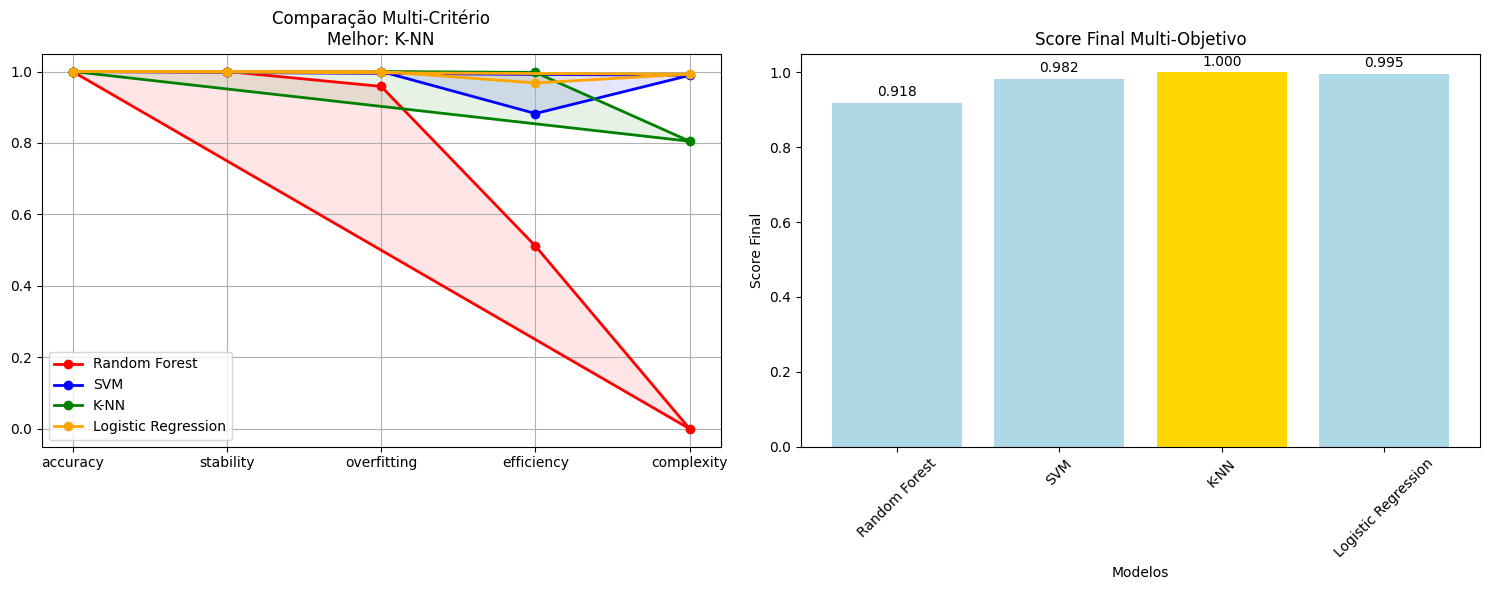

In [ ]:
def main_advanced():
    print("COMPARAÇÃO DE MODELOS")
    print("="*60)

    classifier = AdvancedColorClassifier()

    df = classifier.generate_larger_dataset(samples_per_class=300)

    #Comparação avançada de modelos
    results = classifier.advanced_model_comparison()


    '''classifier.detect_overfitting_underfitting()
    vou chamar essa função aqui quando eu finalizar ela'''

    best_model, best_score = classifier.select_best_model()


    return classifier

if __name__ == "__main__":
    classifier = main_advanced()

# Modelo Escolhido

# Dataframe

In [ ]:
pip install pyserial

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 6.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import joblib
import serial
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Carregando os dados do arquivo dadoscores.csv
df = pd.read_csv('dadoscores.csv')

print("Dataset carregado com sucesso!")
print(f"Total de amostras: {len(df)}")
print(f"\nDistribuição por cor:")
print(df['cor'].value_counts())
print(f"\nEstatísticas básicas:")
print(df.describe())

Dataset carregado com sucesso!
Total de amostras: 1218

Distribuição por cor:
cor
azul        280
verde       250
vermelho    188
magenta     150
amarelo     150
marrom      100
preto       100
Name: count, dtype: int64

Estatísticas básicas:
                 r            g            b
count  1218.000000  1218.000000  1218.000000
mean     74.581281    53.056650    48.238916
std      63.738504    30.383891    27.934150
min       0.000000    10.000000     8.000000
25%      17.000000    31.000000    26.000000
50%      51.000000    54.000000    34.000000
75%     134.000000    63.000000    73.000000
max     204.000000   133.000000   119.000000


# Treinamento e Teste

In [ ]:
#preparação dos dados para o treinamento
X = df[['r', 'g', 'b']].values
y = df['cor'].values

#divisão de dados de testes e treinos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#tive que salvar o arquivo escalonado para usar na predição do serial
joblib.dump(scaler, 'color_scaler.pkl')

print(f"Dados de treino: {X_train.shape}")
print(f"Dados de teste: {X_test.shape}")
print(f"Classes únicas: {np.unique(y)}")

Dados de treino: (974, 3)
Dados de teste: (244, 3)
Classes únicas: ['amarelo' 'azul' 'magenta' 'marrom' 'preto' 'verde' 'vermelho']


In [ ]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42, probability=True),
    'K-NN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

results = {}


for name, model in models.items():
    print(f"Avaliando {name}...")

    #treinamento do modelo
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    #aqui o resultado do treinamento
    y_pred = model.predict(X_test_scaled)

    #cálculo de métricas
    accuracy = accuracy_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'training_time': training_time,
        'predictions': y_pred
    }

    print(f"   Acurácia: {accuracy:.4f}")
    print(f"   Tempo de treino: {training_time:.4f}s")
    print(f"   Relatório de classificação:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("-" * 60)

print("\nTreinamento concluído!")

#eu criei o arquivo modelofinal.pkl pra guardar o treinamento do modelo do K-NN para usar na predição do serial
knn_model = results['K-NN']['model']
joblib.dump(knn_model, 'modelofinal.pkl')
print("Modelo K-NN salvo como 'modelofinal.pkl'")

Avaliando Random Forest...
   Acurácia: 1.0000
   Tempo de treino: 0.1680s
   Relatório de classificação:
              precision    recall  f1-score   support

     amarelo       1.00      1.00      1.00        30
        azul       1.00      1.00      1.00        56
     magenta       1.00      1.00      1.00        30
      marrom       1.00      1.00      1.00        20
       preto       1.00      1.00      1.00        20
       verde       1.00      1.00      1.00        50
    vermelho       1.00      1.00      1.00        38

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244

------------------------------------------------------------
Avaliando SVM...
   Acurácia: 1.0000
   Tempo de treino: 0.0234s
   Relatório de classificação:
              precision    recall  f1-score   support

     amarelo       1.00      1.00      1.00        30
        azul       1.00      1.

In [ ]:
import serial
import joblib
import pandas as pd
# from sklearn.neighbors import KNeighborsClassifier (acho que não se usa aqui), apenas joblib

# Carrega o modelo treinado, atribuindo também a 'COM' na qual está ligado o arduino
scaler = joblib.load("color_scaler.pkl")
model = joblib.load("modelofinal.pkl")
arduino = serial.Serial('COM3', 9600, timeout=1)

def process_color_data(data):
    """Extrai valores R, G, B da string recebida"""
    parts = data.split(',')
    R = int(parts[0].split(':')[1])
    G = int(parts[1].split(':')[1])
    B = int(parts[2].split(':')[1])
    return R, G, B

try:
    while True:
        if arduino.in_waiting > 0:
            # Lê uma linha completa
            raw_data = arduino.readline().decode('utf-8').strip()

            if raw_data.startswith('R:') and 'G:' in raw_data and 'B:' in raw_data:
                try:
                    # Processa os valores
                    r, g, b = process_color_data(raw_data)
                    print("R: ")
                    print(r)
                    print(" G:")
                    print(g)
                    print(" B:")
                    print(b)
                    dados_lidos = np.array([[R, G, B]])
                    dados_escalonados = scaler.transform(dados_lidos)
                    # Faz a predição com o modelo
                    color = model.predict(dados_escalonados)[0]
                    print(f"\nCor encontrada: {color.lower()}")


                    # Envia resposta de volta para Arduino e será mostrado no painel
                    arduino.write(f"{color}\n".encode())

                except Exception as e:
                    print(f"Erro no processamento: {str(e)}")

except KeyboardInterrupt:
    print("Programa encerrado")
    arduino.close()

SerialException: [Errno 2] could not open port COM3: [Errno 2] No such file or directory: 'COM3'